In [2]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [3]:
blood_transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Recency    748 non-null    int64 
 1   Frequency  748 non-null    int64 
 2   Monetary   748 non-null    int64 
 3   Time       748 non-null    int64 
 4   Class      748 non-null    object
dtypes: int64(4), object(1)
memory usage: 29.3+ KB


<AxesSubplot:xlabel='Class'>

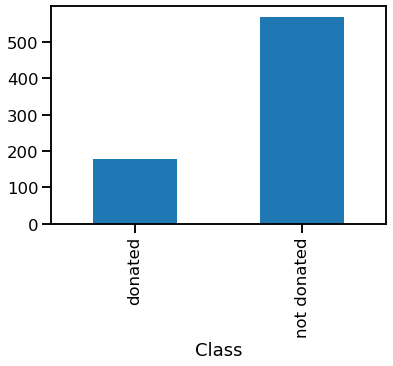

In [12]:
g1=blood_transfusion.groupby("Class")['Time'].count()
g1.plot(kind='bar')

In [9]:
g1.first()

Class
donated        98
not donated    77
Name: Time, dtype: int64

In [14]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(data, target)
dummy_clf.predict(data)

array(['not donated', 'not donated', 'not donated', 'not donated',
       'not donated', 'not donated', 'not donated', 'not donated',
       'not donated', 'not donated', 'not donated', 'not donated',
       'not donated', 'not donated', 'not donated', 'not donated',
       'not donated', 'not donated', 'not donated', 'not donated',
       'not donated', 'not donated', 'not donated', 'not donated',
       'not donated', 'not donated', 'not donated', 'not donated',
       'not donated', 'not donated', 'not donated', 'not donated',
       'not donated', 'not donated', 'not donated', 'not donated',
       'not donated', 'not donated', 'not donated', 'not donated',
       'not donated', 'not donated', 'not donated', 'not donated',
       'not donated', 'not donated', 'not donated', 'not donated',
       'not donated', 'not donated', 'not donated', 'not donated',
       'not donated', 'not donated', 'not donated', 'not donated',
       'not donated', 'not donated', 'not donated', 'not donat

In [16]:
dummy_clf.score(data, target)

0.7620320855614974

In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dummy_clf, data, target, cv=10, scoring="balanced_accuracy")
scores.mean()

0.5

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
pp = Pipeline([('std', StandardScaler()), ('knnc', KNeighborsClassifier(n_neighbors=x))])
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)
scores_train = cross_val_score(pp,X_train, y_train, cv=10, scoring="balanced_accuracy")
scores_test = cross_val_score(pp,X_test, y_test, cv=10, scoring="balanced_accuracy")
scores_train.mean()
scores_test.mean()

0.5660961845172372
0.5943817878028403


In [22]:
param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)
trainL=[]
testL=[]
for x in param_range:
    pp = Pipeline([('std', StandardScaler()), ('knnc', KNeighborsClassifier(n_neighbors=x))])
    scores_train = cross_val_score(pp,X_train, y_train, cv=10, scoring="balanced_accuracy")
    scores_test = cross_val_score(pp,X_test, y_test, cv=10, scoring="balanced_accuracy")
    trainL.append(scores_train.mean())
    testL.append(scores_test.mean())

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: se

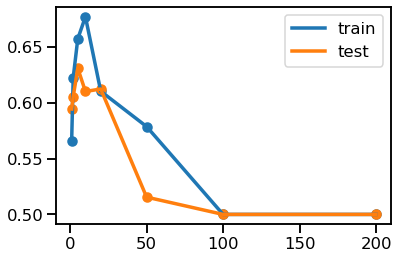

In [26]:
import matplotlib.pyplot as plt
plt.plot(param_range, trainL, label = "train")
plt.plot(param_range, testL, label = "test")
plt.scatter(param_range, trainL)
plt.scatter(param_range, testL)
plt.legend()
plt.show()